#### Automating Crypto Website API Pull Using Python

In [144]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os
from time import time 
from time import sleep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {'start':'1', 'limit':'15', 'convert':'USD'}
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'YOUR_API_KEY',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects):
        return

    df_new = pd.json_normalize(data['data'])  
    df_new['timestamp'] = pd.to_datetime('now')  

   
    if 'df' in globals():
        df = pd.concat([df, df_new], ignore_index=True)
    else:
        df = df_new  

    df = df.sort_values('timestamp') 

    
    csv_path = r'CSV_FILE_LOCATION'
    if not os.path.isfile(csv_path):
        df.to_csv(csv_path, header=True, index=False)
    else:
        df.to_csv(csv_path, mode='a', header=False, index=False)


In [146]:
for i in range(100):
    api_runner()
    print('API Runner completed')
    sleep(5)
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [147]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11958,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19828421.00000,19828421.00000,False,NaN,1,NaN,NaN,None,2025-02-24T11:52:00.000Z,95822.40075,25235569441.35391,61.70180,0.12998,-0.32336,-0.25913,-8.39774,0.22875,4.09916,1900006903366.28247,61.20530,2012270415818.37988,None,2025-02-24T11:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-24 17:24:41.165050
14,1975,Chainlink,LINK,chainlink,1932,2017-09-20T00:00:00.000Z,"[platform, defi, oracles, smart-contracts, eth...",NaN,638099970.45279,1000000000.00000,False,NaN,11,NaN,NaN,None,2025-02-24T11:53:00.000Z,16.66099,367895294.41696,34.65870,0.00220,-6.17257,-13.87928,-33.30899,-27.71607,1.11223,10631379752.16861,0.34240,16660993957.77000,None,2025-02-24T11:53:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2025-02-24 17:24:41.165050
13,2,Litecoin,LTC,litecoin,1319,2013-04-28T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, he...",84000000.00000,75558468.30409,84000000.00000,False,NaN,15,NaN,NaN,None,2025-02-24T11:53:00.000Z,123.92791,861161775.82242,30.33540,0.48264,-2.92509,-0.04773,1.55919,19.09852,38.15921,9363803247.62732,0.30150,10409944648.89000,None,2025-02-24T11:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-24 17:24:41.165050
12,512,Stellar,XLM,stellar,681,2014-08-05T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, dec...",50001806812.00000,30654070018.86700,50001786894.45013,False,NaN,14,NaN,NaN,None,2025-02-24T11:53:00.000Z,0.32054,227059973.12427,43.72390,0.94284,-3.18397,-5.87385,-24.81036,-11.24645,-25.69941,9825807363.47636,0.31640,16027500467.58000,None,2025-02-24T11:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-24 17:24:41.165050
11,5805,Avalanche,AVAX,avalanche,867,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",715748719.00000,414027498.10776,450696998.10776,False,NaN,13,NaN,NaN,None,2025-02-24T11:52:00.000Z,23.81375,342729167.84716,10.86580,0.44553,-5.28877,-6.18689,-32.83417,-37.33932,-39.50543,9859547721.26864,0.31760,17044661728.19000,None,2025-02-24T11:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-24 17:24:41.165050
9,1958,TRON,TRX,tron,1123,2017-09-13T00:00:00.000Z,"[media, payments, ethereum-ecosystem, tron-eco...",NaN,86083109444.36937,86083182734.86945,True,NaN,10,NaN,NaN,None,2025-02-24T11:53:00.000Z,0.24808,575514105.88190,34.35620,0.93475,2.44048,0.57095,-2.62891,-1.66496,31.42279,21355146889.03200,0.68790,21355165070.64000,None,2025-02-24T11:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-24 17:24:41.165050
8,2010,Cardano,ADA,cardano,1466,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35207580215.76900,44995048943.81650,False,NaN,9,NaN,NaN,None,2025-02-24T11:53:00.000Z,0.73430,604471488.39004,22.89080,0.16368,-5.07748,-8.34057,-24.98045,-15.83275,-18.29004,25852756457.42581,0.83280,33043283107.06000,None,2025-02-24T11:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-24 17:24:41.165050
10,20947,Sui,SUI,sui,559,2022-07-12T08:03:11.000Z,"[binance-launchpool, coinbase-ventures-portfol...",10000000000.00000,3089707194.50889,10000000000.00000,False,NaN,12,3089707194.50889,9948993527.69880,None,2025-02-24T11:53:00.000Z,3.22004,799938814.56103,25.43810,0.09206,-3.52241,-1.97440,-23.13762,-24.44150,6.07892,9948993527.69880,0.32040,32200441340.79000,None,2025-0

In [148]:
#TransForming Data
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [149]:
df1 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

In [150]:
pd.set_option('display.max_rows', None)

In [151]:
df_n = df1.stack()
df_n

name                                     
Bitcoin      quote.USD.percent_change_1h      0.12669
             quote.USD.percent_change_24h    -0.33849
             quote.USD.percent_change_7d     -0.30701
             quote.USD.percent_change_30d    -8.41135
             quote.USD.percent_change_60d     0.27561
             quote.USD.percent_change_90d     3.95834
Chainlink    quote.USD.percent_change_1h      0.23301
             quote.USD.percent_change_24h    -6.14112
             quote.USD.percent_change_7d    -13.93454
             quote.USD.percent_change_30d   -33.23752
             quote.USD.percent_change_60d   -27.57788
             quote.USD.percent_change_90d     0.88433
Litecoin     quote.USD.percent_change_1h      0.81254
             quote.USD.percent_change_24h    -2.81144
             quote.USD.percent_change_7d      0.00734
             quote.USD.percent_change_30d     1.47295
             quote.USD.percent_change_60d    19.48904
             quote.USD.percent_change_90

In [152]:
type(df_n)

pandas.core.series.Series

In [153]:
df2 = df_n.to_frame(name='values')

In [154]:
df2

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.12669
            quote.USD.percent_change_24h  -0.33849
            quote.USD.percent_change_7d   -0.30701
            quote.USD.percent_change_30d  -8.41135
            quote.USD.percent_change_60d   0.27561
            quote.USD.percent_change_90d   3.95834
Chainlink   quote.USD.percent_change_1h    0.23301
            quote.USD.percent_change_24h  -6.14112
            quote.USD.percent_change_7d  -13.93454
            quote.USD.percent_change_30d -33.23752
            quote.USD.percent_change_60d -27.57788
            quote.USD.percent_change_90d   0.88433
Litecoin    quote.USD.percent_change_1h    0.81254
            quote.USD.percent_change_24h  -2.81144
            quote.USD.percent_change_7d    0.00734
            quote.USD.percent_change_30d   1.47295
            quote.USD.percent_change_60d  19.48904
            quote.USD.percent_change_90d  37.83929
Stellar     quote.USD.percent_change_1h    1.03326
            quote.USD.percent_change_24h  -3.03821
            quote.USD.percent_change_7d   -5.92045
            quote.USD.percent_change_30d -24.69229
            quote.USD.percent_change_60d -10.98611
            quote.USD.percent_change_90d -26.21453
Avalanche   quote.USD.percent_change_1h    0.54877
            quote.USD.percent_change_24h  -5.17195
            quote.USD.percent_change_7d   -6.23661
            quote.USD.percent_change_30d -32.81834
            quote.USD.percent_change_60d -37.18870
            quote.USD.percent_change_90d -40.27883
TRON        quote.USD.percent_change_1h    0.78820
            quote.USD.percent_change_24h   2.42412
            quote.USD.percent_change_7d    0.55644
            quote.USD.percent_change_30d  -2.56694
            quote.USD.percent_change_60d  -1.57014
            quote.USD.percent_change_90d  31.16166
Cardano     quote.USD.percent_change_1h    0.21777
            quote.USD.percent_change_24h  -4.92913
            quote.USD.percent_change_7d   -8.33341
            quote.USD.percent_change_30d -24.94046
            quote.USD.percent_change_60d -15.61585
            quote.USD.percent_change_90d -18.39819
Sui         quote.USD.percent_change_1h   -0.24969
            quote.USD.percent_change_24h  -3.50092
            quote.USD.percent_change_7d   -2.21632
            quote.USD.percent_change_30d -23.15974
            quote.USD.percent_change_60d -24.42456
            quote.USD.percent_change_90d   4.95343
USDC        quote.USD.percent_change_1h    0.00218
            quote.USD.percent_change_24h  -0.00176
            quote.USD.percent_change_7d   -0.00515
            quote.USD.percent_change_30d  -0.00702
            quote.USD.percent_change_60d  -0.00633
            quote.USD.percent_change_90d  -0.00498
Solana      quote.USD.percent_change_1h    1.45309
            quote.USD.percent_change_24h  -6.14397
            quote.USD.percent_change_7d  -13.64908
            quote.USD.percent_change_30d -36.27157
            quote.USD.percent_change_60d -16.02264
            quote.USD.percent_change_90d -29.89305
XRP         quote.USD.percent_change_1h    0.83535
            quote.USD.percent_change_24h  -3.23575
            quote.USD.percent_change_7d   -6.98911
            quote.USD.percent_change_30d -20.11239
            quote.USD.percent_change_60d  13.70000
            quote.USD.percent_change_90d  87.53367
Ethereum    quote.USD.percent_change_1h    0.17236
            quote.USD.percent_change_24h  -3.98506
            quote.USD.percent_change_7d   -2.53702
            quote.USD.percent_change_30d -18.67503
            quote.USD.percent_change_60d -20.17367
            quote.USD.percent_change_90d -19.02664
Dogecoin    quote.USD.percent_change_1h    0.58806
            quote.USD.percent_change_24h  -5.44747
            quote.USD.percent_change_7d  -12.26905
            quote.USD.percent_change_30d -33.98831
            quote.USD.percent_change_60d -27.09172
            quo

In [155]:
df2.count()

values    90
dtype: int64

In [156]:
index = pd.Index(range(90))

df3 = df2.reset_index()

df3

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.12669
1,Bitcoin,quote.USD.percent_change_24h,-0.33849
2,Bitcoin,quote.USD.percent_change_7d,-0.30701
3,Bitcoin,quote.USD.percent_change_30d,-8.41135
4,Bitcoin,quote.USD.percent_change_60d,0.27561
5,Bitcoin,quote.USD.percent_change_90d,3.95834
6,Chainlink,quote.USD.percent_change_1h,0.23301
7,Chainlink,quote.USD.percent_change_24h,-6.14112
8,Chainlink,quote.USD.percent_change_7d,-13.93454
9,Chainlink,quote.USD.percent_change_30d,-33.23752


In [157]:
df4 = df3.rename(columns={'level_1' : 'percent_change'})
df4

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.12669
1,Bitcoin,quote.USD.percent_change_24h,-0.33849
2,Bitcoin,quote.USD.percent_change_7d,-0.30701
3,Bitcoin,quote.USD.percent_change_30d,-8.41135
4,Bitcoin,quote.USD.percent_change_60d,0.27561
5,Bitcoin,quote.USD.percent_change_90d,3.95834
6,Chainlink,quote.USD.percent_change_1h,0.23301
7,Chainlink,quote.USD.percent_change_24h,-6.14112
8,Chainlink,quote.USD.percent_change_7d,-13.93454
9,Chainlink,quote.USD.percent_change_30d,-33.23752


In [158]:
df4['percent_change'] = df4['percent_change'].replace(['quote.USD.percent_change_24h', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d', 'quote.USD.percent_change_1h', 'quote.USD.percent_change_7d'], ['24h', '30d', '60d', '90d', '1h', '7d']) 

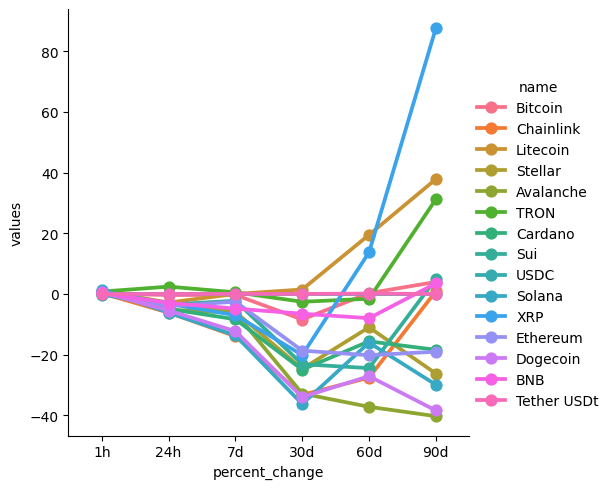

In [159]:
sns.catplot(x='percent_change', y='values', hue='name', data=df4, kind='point')

In [160]:
df['timestamp'] = pd.to_datetime(df['timestamp'])  
df = df.sort_values('timestamp')  

df5 = df[['name', 'quote.USD.price', 'timestamp']] 
df5 = df5[df5['name'] == 'Bitcoin'] 

print(df5.head(10)) 


       name  quote.USD.price                  timestamp
0   Bitcoin      95822.40075 2025-02-24 17:24:41.165050
15  Bitcoin      95803.98520 2025-02-24 17:34:42.620849
42  Bitcoin      95803.98520 2025-02-24 17:34:48.373895
52  Bitcoin      95803.98520 2025-02-24 17:34:54.206776
71  Bitcoin      95803.98520 2025-02-24 17:34:59.952394
75  Bitcoin      95773.11602 2025-02-24 17:35:05.706263


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

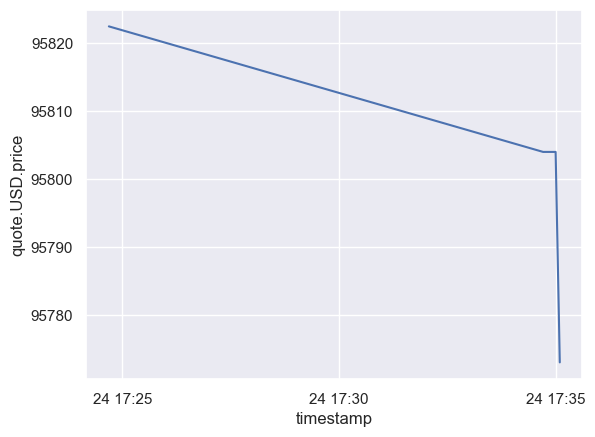

In [163]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df5)